In [2]:
!pip install tensorflow keras numpy matplotlib pandas seaborn scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow import keras

# 載入MNIST數據集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 查看數據集形狀
print(f"訓練數據形狀: {x_train.shape}")
print(f"訓練標籤形狀: {y_train.shape}")
print(f"測試數據形狀: {x_test.shape}")
print(f"測試標籤形狀: {y_test.shape}")

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
import sys
print(sys.executable)  # 顯示當前使用的Python路徑

/opt/anaconda3/bin/python


In [33]:
import sys
!{sys.executable} -m pip install tensorflow

In [53]:
import tensorflow as tf
from tensorflow import keras

# 載入MNIST數據集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 查看數據集形狀
print(f"訓練數據形狀: {x_train.shape}")
print(f"訓練標籤形狀: {y_train.shape}")
print(f"測試數據形狀: {x_test.shape}")
print(f"測試標籤形狀: {y_test.shape}")

訓練數據形狀: (60000, 28, 28)
訓練標籤形狀: (60000,)
測試數據形狀: (10000, 28, 28)
測試標籤形狀: (10000,)


/var/folders/vm/b6cn0cmx2b50rrzbp9zb2z6r0000gp/T/ipykernel_33052/3217235657.py:10: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vm/b6cn0cmx2b50rrzbp9zb2z6r0000gp/T/ipykernel_33052/3217235657.py:10: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


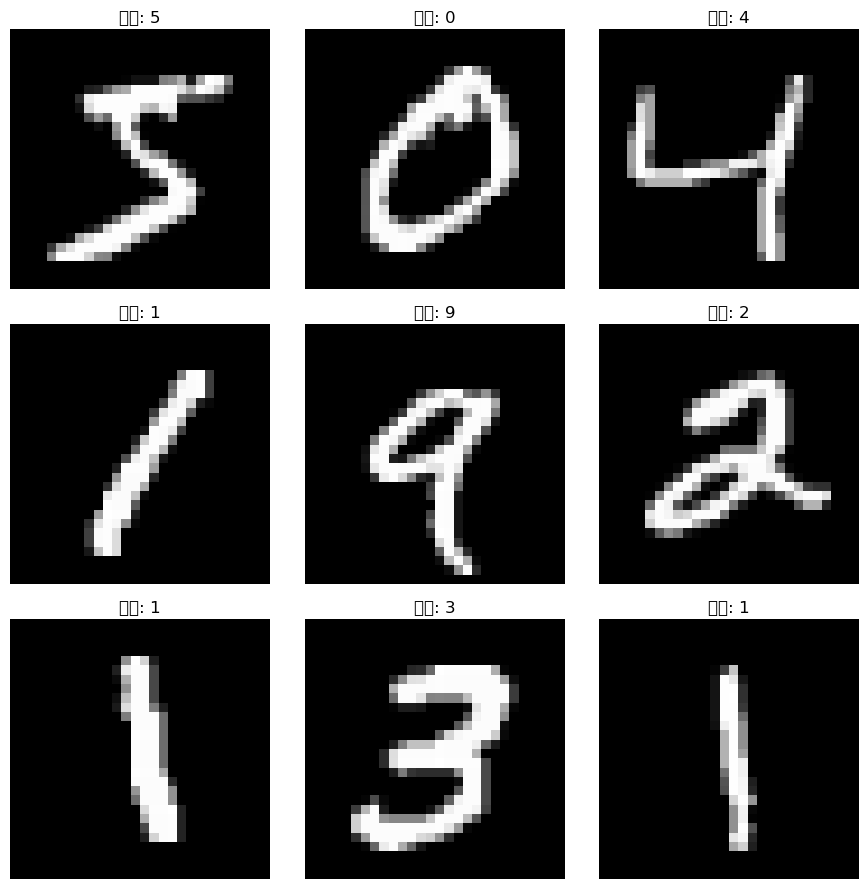

In [55]:
import matplotlib.pyplot as plt

# 顯示前9張圖像
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"標籤: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [71]:
# 載入Boston房價數據集
(boston_x_train, boston_y_train), (boston_x_test, boston_y_test) = keras.datasets.boston_housing.load_data()

# 查看數據集形狀
print(f"訓練數據形狀: {boston_x_train.shape}")
print(f"訓練標籤形狀: {boston_y_train.shape}")
print(f"測試數據形狀: {boston_x_test.shape}")
print(f"測試標籤形狀: {boston_y_test.shape}")

訓練數據形狀: (404, 13)
訓練標籤形狀: (404,)
測試數據形狀: (102, 13)
測試標籤形狀: (102,)


In [87]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

# 用於MNIST數據集的模型構建函數
def build_mnist_model(hidden_layers=1, neurons_per_layer=128, activation='relu'):
    """
    構建具有指定配置的MNIST分類模型
    
    參數:
    hidden_layers: 隱藏層數量
    neurons_per_layer: 每層的神經元數量
    activation: 激活函數 ('sigmoid', 'relu', 或 'softplus')
    
    返回:
    編譯好的模型
    """
    model = keras.Sequential()
    
    # 輸入層 (將28x28圖像展平為784維向量)
    model.add(keras.layers.Input(shape=(784,)))
    
    # 隱藏層
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation))
    
    # 輸出層 (10個類別，使用softmax激活函數)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # 編譯模型
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 用於Boston房價數據集的模型構建函數
def build_boston_model(hidden_layers=1, neurons_per_layer=64, activation='relu'):
    """
    構建具有指定配置的Boston房價迴歸模型
    
    參數:
    hidden_layers: 隱藏層數量
    neurons_per_layer: 每層的神經元數量
    activation: 激活函數 ('sigmoid', 'relu', 或 'softplus')
    
    返回:
    編譯好的模型
    """
    model = keras.Sequential()
    
    # 輸入層 (Boston數據集有13個特徵)
    model.add(keras.layers.Input(shape=(13,)))
    
    # 隱藏層
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation))
    
    # 輸出層 (單一數值輸出，無激活函數)
    model.add(keras.layers.Dense(1))
    
    # 編譯模型
    model.compile(
        optimizer='adam',
        loss='mse',  # 均方誤差
        metrics=['mae']  # 平均絕對誤差
    )
    
    return model

In [89]:
# MNIST模型的訓練和評估函數
def train_evaluate_mnist(model, x_train, y_train, x_test, y_test, 
                         batch_size=128, epochs=10, verbose=1):
    """
    訓練和評估MNIST模型，返回結果
    
    參數:
    model: 要訓練的模型
    x_train, y_train: 訓練數據和標籤
    x_test, y_test: 測試數據和標籤
    batch_size: 批次大小
    epochs: 訓練輪數
    verbose: 詳細程度
    
    返回:
    包含訓練歷史和評估結果的字典
    """
    # 記錄開始時間
    start_time = time.time()
    
    # 訓練模型
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,  # 使用10%的訓練數據做驗證
        verbose=verbose
    )
    
    # 計算訓練時間
    training_time = time.time() - start_time
    
    # 評估模型
    _, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    # 返回結果
    return {
        'history': history,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time
    }

# 定義一個函數來計算MAPE (平均絕對百分比誤差)
def mean_absolute_percentage_error(y_true, y_pred):
    """計算平均絕對百分比誤差"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Boston房價模型的訓練和評估函數
def train_evaluate_boston(model, x_train, y_train, x_test, y_test, 
                          batch_size=32, epochs=100, verbose=1):
    """
    訓練和評估Boston房價模型，返回結果
    
    參數:
    model: 要訓練的模型
    x_train, y_train: 訓練數據和標籤
    x_test, y_test: 測試數據和標籤
    batch_size: 批次大小
    epochs: 訓練輪數
    verbose: 詳細程度
    
    返回:
    包含訓練歷史和評估結果的字典
    """
    # 記錄開始時間
    start_time = time.time()
    
    # 訓練模型
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=verbose
    )
    
    # 計算訓練時間
    training_time = time.time() - start_time
    
    # 模型預測
    y_train_pred = model.predict(x_train).flatten()
    y_test_pred = model.predict(x_test).flatten()
    
    # 計算評估指標
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import math
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # 返回結果
    return {
        'history': history,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mape': train_mape,
        'test_mape': test_mape,
        'training_time': training_time
    }

In [91]:
# 用於繪製訓練歷史的函數
def plot_mnist_history(history, title):
    """Plot training history of the model"""
    plt.figure(figsize=(12, 4))
    
    # 繪製損失
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss') #訓練損失
    plt.plot(history.history['val_loss'], label='Validation Loss')  #驗證損失
    plt.title(f"{title} - Loss Curve")#損失曲線
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # 繪製準確率
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy') #訓練準確率
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  #驗證準確率
    plt.title(f"{title} - Accuracy Curve") #準確率曲線
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 用於繪製Boston模型訓練歷史的函數
def plot_boston_history(history, title):
    """Plot training history of the Boston Housing price model"""
    plt.figure(figsize=(12, 4))
    
    # 繪製損失
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss Curve")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # 繪製MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f"{title} - MAE Curve")
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [95]:
# MNIST數據預處理
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 標準化像素值
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 將圖像展平
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
# 將標籤轉為one-hot編碼
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
print("MNIST data preprocessing completed")  # MNIST數據預處理完成
print(f"Training data shape: {x_train_flat.shape}, Training labels shape: {y_train_cat.shape}")  # 訓練數據形狀和標籤形狀
print(f"Test data shape: {x_test_flat.shape}, Test labels shape: {y_test_cat.shape}")  # 測試數據形狀和標籤形狀

# Boston房價數據預處理
(boston_x_train, boston_y_train), (boston_x_test, boston_y_test) = keras.datasets.boston_housing.load_data()
# 標準化特徵
boston_mean = boston_x_train.mean(axis=0)
boston_std = boston_x_train.std(axis=0)
boston_x_train = (boston_x_train - boston_mean) / boston_std
boston_x_test = (boston_x_test - boston_mean) / boston_std
print("\nBoston Housing data preprocessing completed")  # Boston房價數據預處理完成
print(f"Training data shape: {boston_x_train.shape}, Training labels shape: {boston_y_train.shape}")  # 訓練數據形狀和標籤形狀
print(f"Test data shape: {boston_x_test.shape}, Test labels shape: {boston_y_test.shape}")  # 測試數據形狀和標籤形狀

MNIST data preprocessing completed
Training data shape: (60000, 784), Training labels shape: (60000, 10)
Test data shape: (10000, 784), Test labels shape: (10000, 10)

Boston Housing data preprocessing completed
Training data shape: (404, 13), Training labels shape: (404,)
Test data shape: (102, 13), Test labels shape: (102,)


In [97]:
# 實驗1：不同網路深度的配置
depth_configs = [
    {'name': 'Shallow Network', 'hidden_layers': 1, 'neurons': 128},
    {'name': 'Medium Network', 'hidden_layers': 2, 'neurons': 128},
    {'name': 'Deep Network', 'hidden_layers': 4, 'neurons': 128}
]

# 實驗2：不同激活函數的配置
activation_configs = [
    {'name': 'Sigmoid', 'activation': 'sigmoid'},
    {'name': 'ReLU', 'activation': 'relu'},
    {'name': 'Softplus', 'activation': 'softplus'}
]

# 實驗3：不同批次大小和訓練輪數的配置
batch_epoch_configs = [
    {'name': 'Small Batch Short Training', 'batch_size': 16, 'epochs': 5},
    {'name': 'Large Batch Short Training', 'batch_size': 128, 'epochs': 5},
    {'name': 'Medium Batch Medium Training', 'batch_size': 64, 'epochs': 10},
    {'name': 'Medium Batch Long Training', 'batch_size': 64, 'epochs': 20}
]


========== MNIST - Experiment 1: Comparing Different Network Depths ==========

Training Shallow Network (Hidden Layers: 1)...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8232 - loss: 0.6451 - val_accuracy: 0.9560 - val_loss: 0.1690
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9484 - loss: 0.1838 - val_accuracy: 0.9662 - val_loss: 0.1243
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1284 - val_accuracy: 0.9710 - val_loss: 0.1038
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0997 - val_accuracy: 0.9743 - val_loss: 0.0940
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0770 - val_accuracy: 0.9753 - val_loss: 0.0844
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0660 - val_accuracy: 0.9767 - val_loss: 0.0818
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0538 - val_accuracy: 0.

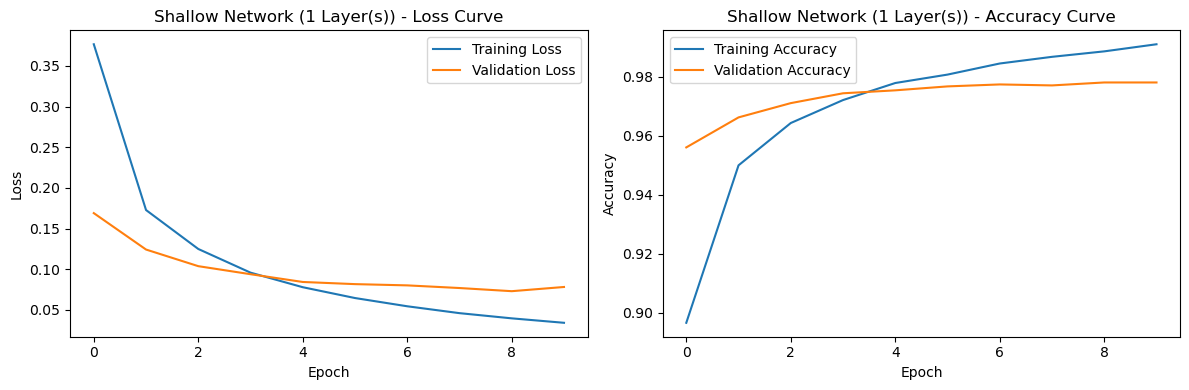


Training Medium Network (Hidden Layers: 2)...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8332 - loss: 0.6001 - val_accuracy: 0.9585 - val_loss: 0.1429
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1381 - val_accuracy: 0.9725 - val_loss: 0.0988
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0901 - val_accuracy: 0.9747 - val_loss: 0.0899
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0660 - val_accuracy: 0.9762 - val_loss: 0.0850
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0543 - val_accuracy: 0.9750 - val_loss: 0.0847
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0403 - val_accuracy: 0.9773 - val_loss: 0.0824
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9785 - val_loss: 0.0838
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

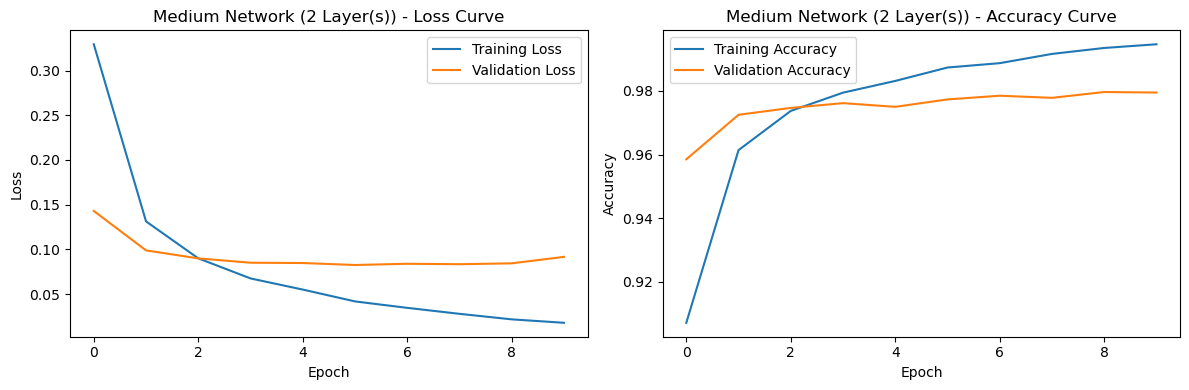


Training Deep Network (Hidden Layers: 4)...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8044 - loss: 0.6446 - val_accuracy: 0.9585 - val_loss: 0.1346
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1339 - val_accuracy: 0.9718 - val_loss: 0.0967
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0855 - val_accuracy: 0.9725 - val_loss: 0.0920
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0666 - val_accuracy: 0.9780 - val_loss: 0.0782
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0473 - val_accuracy: 0.9773 - val_loss: 0.0768
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9732 - val_loss: 0.1009
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9745 - val_loss: 0.0816
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accur

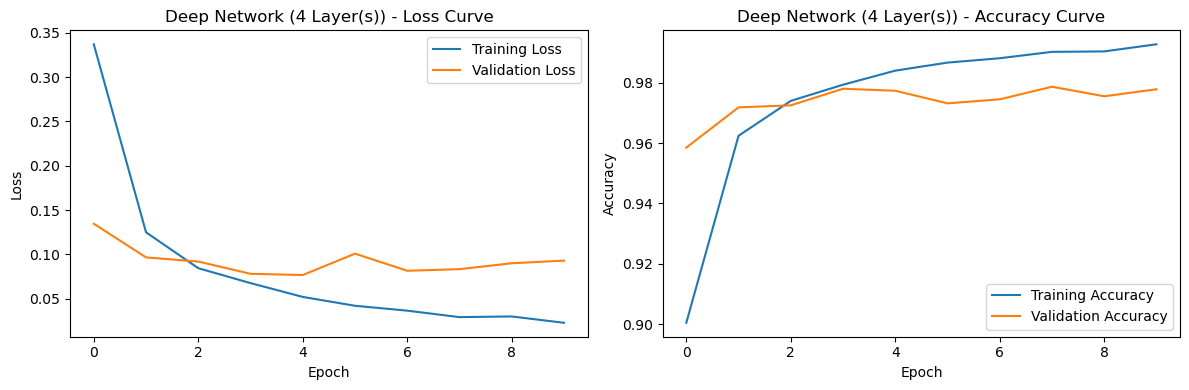

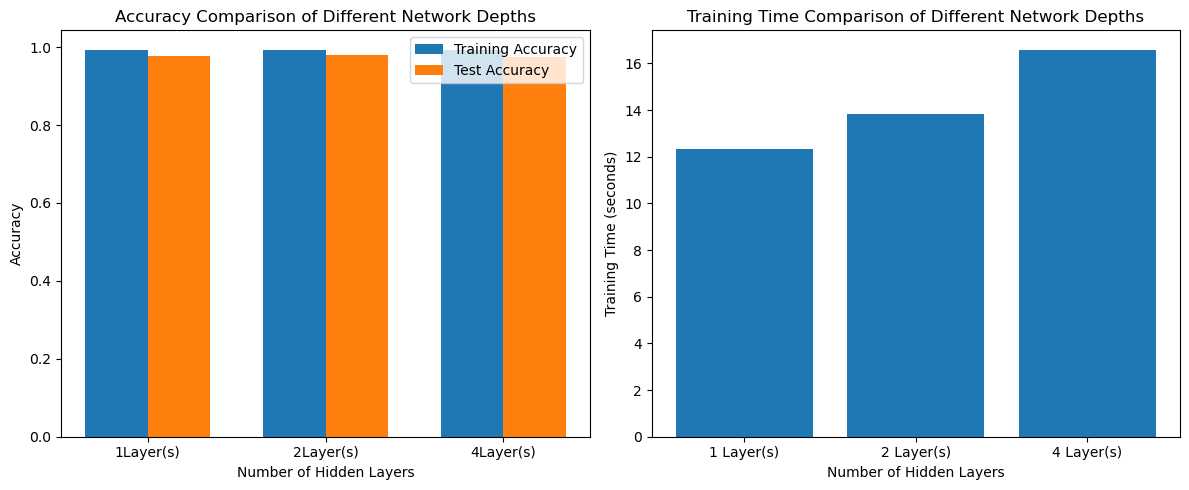

In [83]:
# MNIST - 實驗1：比較不同網絡深度
print("\n========== MNIST - Experiment 1: Comparing Different Network Depths ==========")

# 存儲實驗結果
depth_results = []

# 執行實驗
for config in depth_configs:
    print(f"\nTraining {config['name']} (Hidden Layers: {config['hidden_layers']})...")
    
    # 構建模型
    model = build_mnist_model(
        hidden_layers=config['hidden_layers'],
        neurons_per_layer=config['neurons']
    )
    
    # 訓練和評估模型
    result = train_evaluate_mnist(
        model, x_train_flat, y_train_cat, x_test_flat, y_test_cat,
        epochs=10
    )
    
    # 添加配置信息
    result['config'] = config
    depth_results.append(result)
    
    # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Training Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    
    # 繪製訓練歷史
    plot_mnist_history(result['history'], f"{config['name']} ({config['hidden_layers']} Layer(s))")

# 比較不同深度的結果
plt.figure(figsize=(12, 5))

# 準確率對比
plt.subplot(1, 2, 1)
layer_counts = [config['hidden_layers'] for config in depth_configs]
train_accs = [result['train_accuracy'] for result in depth_results]
test_accs = [result['test_accuracy'] for result in depth_results]

x = np.arange(len(layer_counts))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Training Accuracy')#訓練集準確率
plt.bar(x + width/2, test_accs, width, label='Test Accuracy')#測試集準確率
plt.xlabel('Number of Hidden Layers')#隱藏層數量
plt.ylabel('Accuracy')#準確率
plt.title('Accuracy Comparison of Different Network Depths')#不同網絡深度的準確率比較
plt.xticks(x, [f"{d}Layer(s)" for d in layer_counts])
plt.legend()

# 訓練時間對比
plt.subplot(1, 2, 2)
times = [result['training_time'] for result in depth_results]
plt.bar(x, times)
plt.xlabel('Number of Hidden Layers') #隱藏層數量
plt.ylabel('Training Time (seconds)')#訓練時間（秒）
plt.title('Training Time Comparison of Different Network Depths')#不同網絡深度的訓練時間比較
plt.xticks(x, [f"{d} Layer(s)" for d in layer_counts])

plt.tight_layout()
plt.show()

In [ ]:
========== MNIST實驗結果分析 ==========
1. 網絡深度實驗結果:
  淺層網絡 (1層): 測試準確率 = 0.9776, 訓練時間 = 12.33秒
  中層網絡 (2層): 測試準確率 = 0.9796, 訓練時間 = 13.83秒
  深層網絡 (4層): 測試準確率 = 0.9760, 訓練時間 = 16.59秒

從實驗結果可以觀察到，中層網絡(2層)達到了最高的測試準確率(0.9796)，而深層網絡(4層)的準確率(0.9760)反而略低於中層網絡，甚至比淺層網絡(0.9776)還低。這表明對於MNIST這樣相對簡單的任務，過度增加網絡深度不僅無法持續提升性能，反而可能導致性能下降。同時，網絡深度越大，訓練時間也隨之增加，從淺層的12.33秒增加到深層的16.59秒。


========== MNIST - Experiment 2: Comparing Different Activation Functions ==========

Training model with Sigmoid activation function...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6421 - loss: 1.3315 - val_accuracy: 0.9293 - val_loss: 0.2674
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9156 - loss: 0.2961 - val_accuracy: 0.9473 - val_loss: 0.1870
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9358 - loss: 0.2176 - val_accuracy: 0.9580 - val_loss: 0.1530
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.1725 - val_accuracy: 0.9665 - val_loss: 0.1276
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9599 - loss: 0.1383 - val_accuracy: 0.9692 - val_loss: 0.1113
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1181 - val_accuracy: 0.9708 - val_loss: 0.0999
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9728 - loss: 0.1000 - val_ac

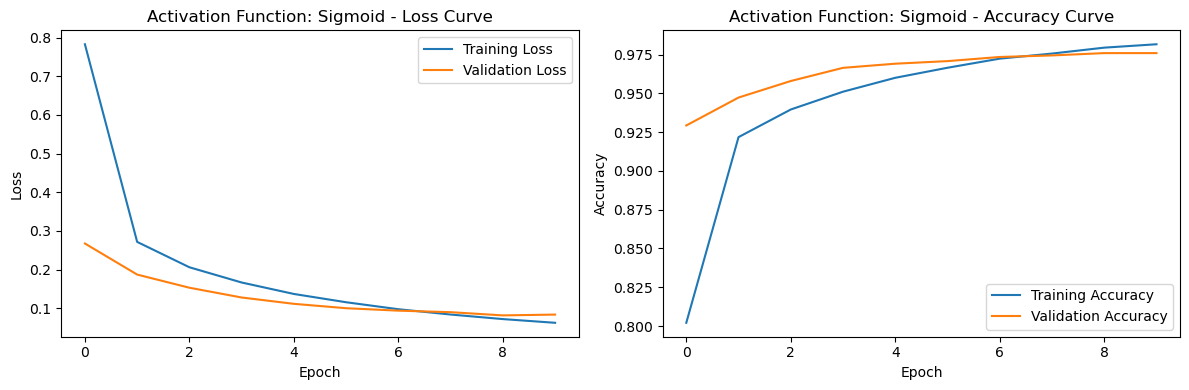


Training model with ReLU activation function...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8324 - loss: 0.6136 - val_accuracy: 0.9648 - val_loss: 0.1332
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9591 - loss: 0.1412 - val_accuracy: 0.9710 - val_loss: 0.1033
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9729 - loss: 0.0913 - val_accuracy: 0.9740 - val_loss: 0.0900
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.9752 - val_loss: 0.0842
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9758 - val_loss: 0.0826
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9763 - val_loss: 0.0846
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9777 - val_loss: 0.0811
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

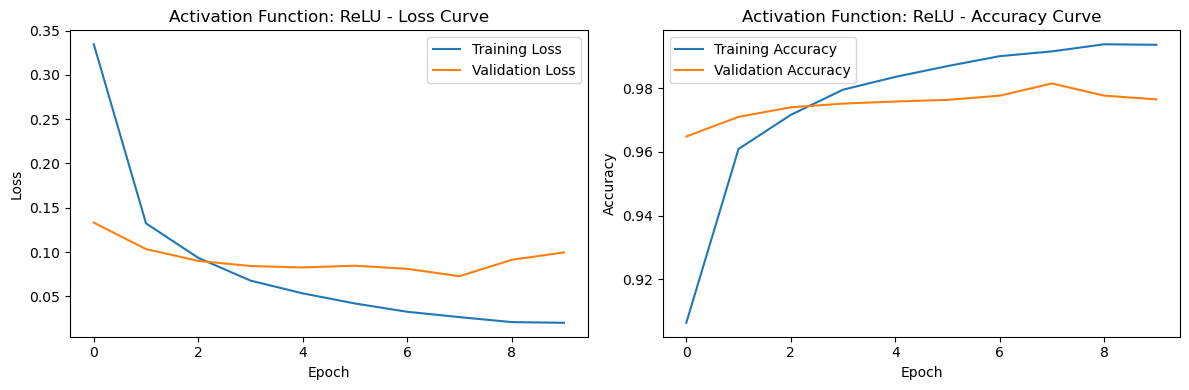


Training model with Softplus activation function...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7801 - loss: 0.7699 - val_accuracy: 0.9330 - val_loss: 0.2332
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9279 - loss: 0.2457 - val_accuracy: 0.9572 - val_loss: 0.1536
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9507 - loss: 0.1690 - val_accuracy: 0.9668 - val_loss: 0.1198
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9618 - loss: 0.1308 - val_accuracy: 0.9690 - val_loss: 0.1055
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1021 - val_accuracy: 0.9725 - val_loss: 0.0935
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0826 - val_accuracy: 0.9742 - val_loss: 0.0873
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0698 - val_accuracy: 0.9728 - val_loss: 0.0894
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

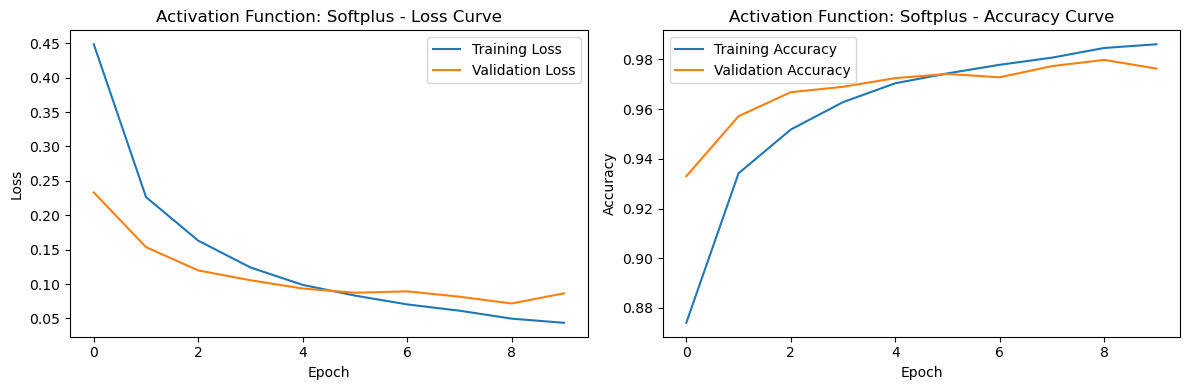

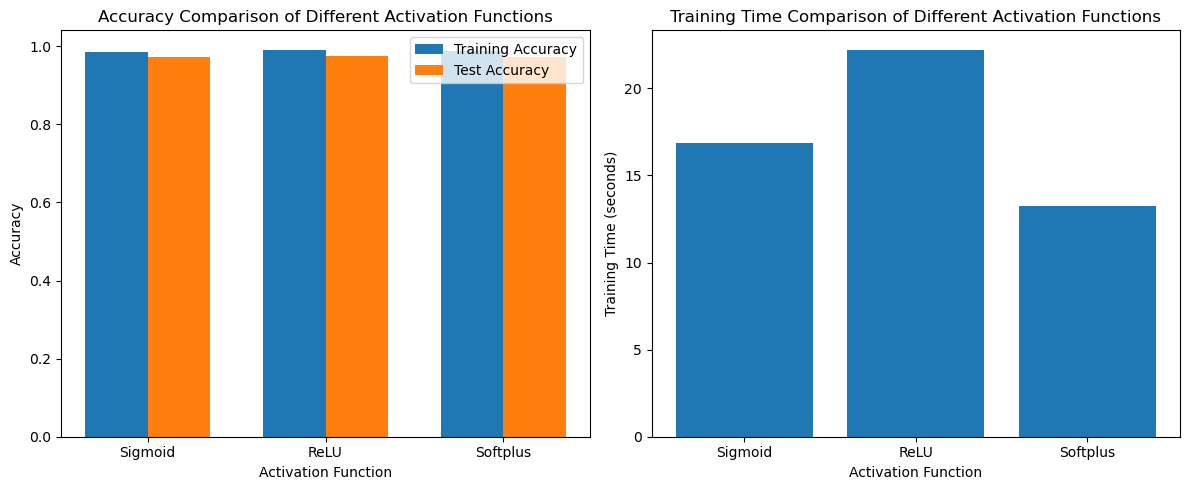

In [99]:
# MNIST - 實驗2：比較不同激活函數
print("\n========== MNIST - Experiment 2: Comparing Different Activation Functions ==========")  
 # 存儲實驗結果
activation_results = []
 # 執行實驗
for config in activation_configs:
    print(f"\nTraining model with {config['name']} activation function...")  # 輸出正在訓練的激活函數
    
      # 構建模型
    model = build_mnist_model(
        hidden_layers=2,  # 使用2層隱藏層
        neurons_per_layer=128,
        activation=config['activation']
    )
    
    # 訓練和評估模型
    result = train_evaluate_mnist(
        model, x_train_flat, y_train_cat, x_test_flat, y_test_cat,
        epochs=10
    )
    
     # 添加配置信息
    result['config'] = config
    activation_results.append(result)
    
     # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")  # 訓練時間
    print(f"Training Accuracy: {result['train_accuracy']:.4f}")  # 訓練集準確率
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")  # 測試集準確率
    
    # Plot training history  # 繪製訓練歷史
    plot_mnist_history(result['history'], f"Activation Function: {config['name']}")  # 繪製激活函數歷史圖表

 # 比較不同激活函數的結果
plt.figure(figsize=(12, 5))
 # 準確率對比
plt.subplot(1, 2, 1)
acts = [config['name'] for config in activation_configs]
train_accs = [result['train_accuracy'] for result in activation_results]
test_accs = [result['test_accuracy'] for result in activation_results]
x = np.arange(len(acts))
width = 0.35
plt.bar(x - width/2, train_accs, width, label='Training Accuracy')  # 訓練集準確率
plt.bar(x + width/2, test_accs, width, label='Test Accuracy')  # 測試集準確率
plt.xlabel('Activation Function')  # X軸標籤：激活函數
plt.ylabel('Accuracy')  # Y軸標籤：準確率
plt.title('Accuracy Comparison of Different Activation Functions')  # 標題：不同激活函數的準確率比較
plt.xticks(x, acts)
plt.legend()
 # 訓練時間對比
plt.subplot(1, 2, 2)
times = [result['training_time'] for result in activation_results]
plt.bar(x, times)
plt.xlabel('Activation Function')  # X軸標籤：激活函數
plt.ylabel('Training Time (seconds)')  # Y軸標籤：訓練時間（秒）
plt.title('Training Time Comparison of Different Activation Functions')  # 標題：不同激活函數的訓練時間比較
plt.xticks(x, acts)
plt.tight_layout()
plt.show()

In [ ]:
========== MNIST實驗結果分析 ==========
2. 激活函數實驗結果:
  Sigmoid: 測試準確率 = 0.9723, 訓練時間 = 16.87秒
  ReLU: 測試準確率 = 0.9758, 訓練時間 = 22.22秒
  Softplus: 測試準確率 = 0.9729, 訓練時間 = 13.25秒

分析: 比較三種激活函數的結果顯示，ReLU函數達到了最高的測試準確率(0.9758)，但其訓練時間(22.22秒)反而是最長的，這與理論預期有所不同。Sigmoid函數的準確率(0.9723)略低，訓練時間為16.87秒。Softplus作為ReLU的平滑版本，雖然準確率(0.9729)介於兩者之間，但在三種函數中展現出最佳的訓練效率，僅需13.25秒。


========== MNIST - Experiment 3: Comparing Different Batch Sizes and Epochs ==========

Training model with batch_size=16, epochs=5...
Epoch 1/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8863 - loss: 0.3781 - val_accuracy: 0.9662 - val_loss: 0.1091
Epoch 2/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9694 - loss: 0.0947 - val_accuracy: 0.9715 - val_loss: 0.0915
Epoch 3/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9774 - loss: 0.0715 - val_accuracy: 0.9727 - val_loss: 0.1029
Epoch 4/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9837 - loss: 0.0497 - val_accuracy: 0.9737 - val_loss: 0.0946
Epoch 5/5
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9875 - loss: 0.0374 - val_accuracy: 0.9798 - val_loss: 0.0789
Training Time: 36.19 seconds
Training Accuracy: 0.9903
Test Accuracy: 0.9788


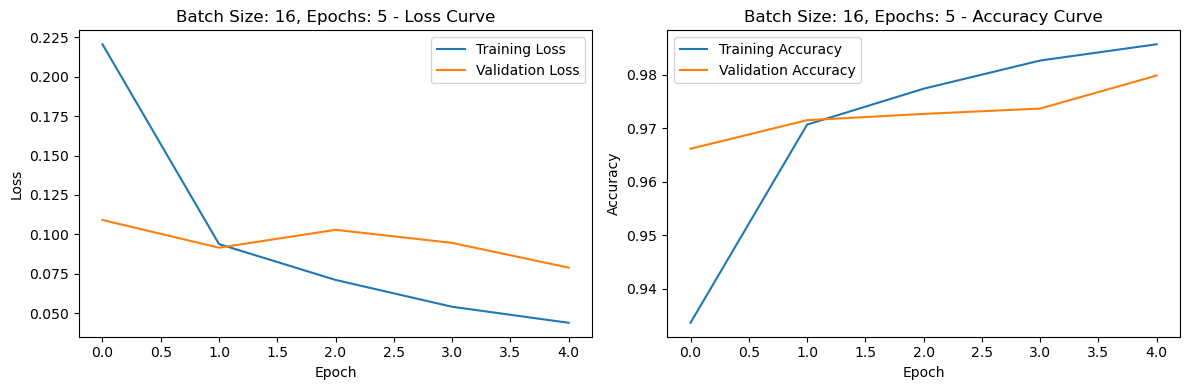


Training model with batch_size=128, epochs=5...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8355 - loss: 0.5994 - val_accuracy: 0.9637 - val_loss: 0.1334
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9581 - loss: 0.1384 - val_accuracy: 0.9715 - val_loss: 0.1051
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0852 - val_accuracy: 0.9685 - val_loss: 0.1107
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0685 - val_accuracy: 0.9788 - val_loss: 0.0798
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0488 - val_accuracy: 0.9753 - val_loss: 0.0869
Training Time: 6.60 seconds
Training Accuracy: 0.9881
Test Accuracy: 0.9769


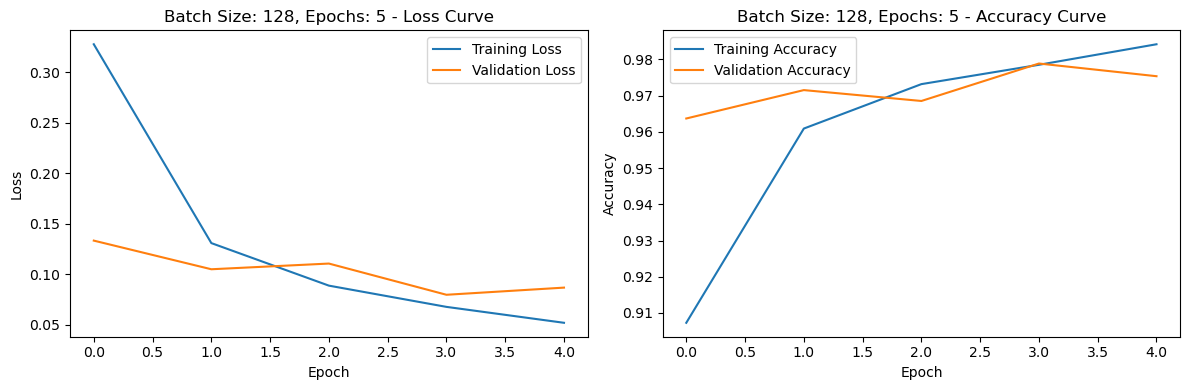


Training model with batch_size=64, epochs=10...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8509 - loss: 0.5213 - val_accuracy: 0.9628 - val_loss: 0.1231
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9645 - loss: 0.1216 - val_accuracy: 0.9728 - val_loss: 0.0932
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9759 - loss: 0.0798 - val_accuracy: 0.9755 - val_loss: 0.0889
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9831 - loss: 0.0554 - val_accuracy: 0.9787 - val_loss: 0.0796
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9859 - loss: 0.0426 - val_accuracy: 0.9772 - val_loss: 0.0804
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9765 - val_loss: 0.0871
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9783 - val_loss: 0.0864
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a

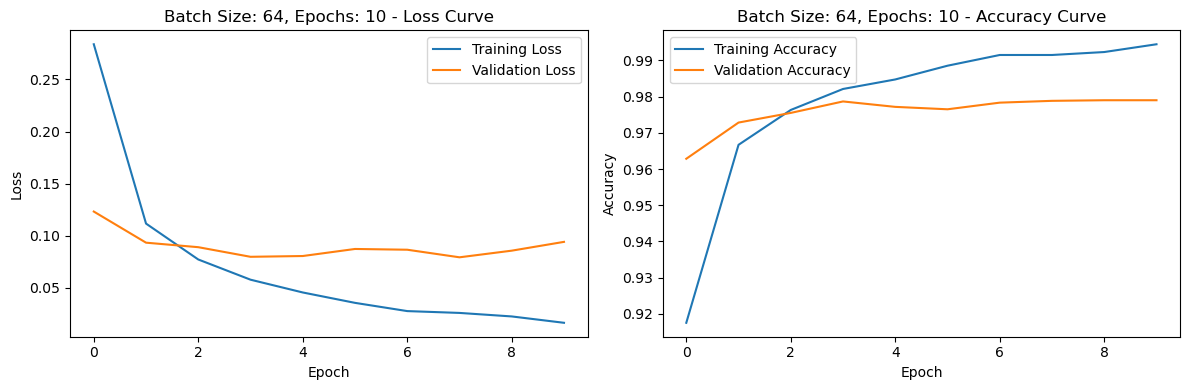


Training model with batch_size=64, epochs=20...
Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8532 - loss: 0.5086 - val_accuracy: 0.9675 - val_loss: 0.1149
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.1179 - val_accuracy: 0.9750 - val_loss: 0.0863
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9768 - loss: 0.0741 - val_accuracy: 0.9768 - val_loss: 0.0863
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9839 - loss: 0.0550 - val_accuracy: 0.9780 - val_loss: 0.0817
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0397 - val_accuracy: 0.9810 - val_loss: 0.0708
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9778 - val_loss: 0.0797
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9793 - val_loss: 0.0785
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - a

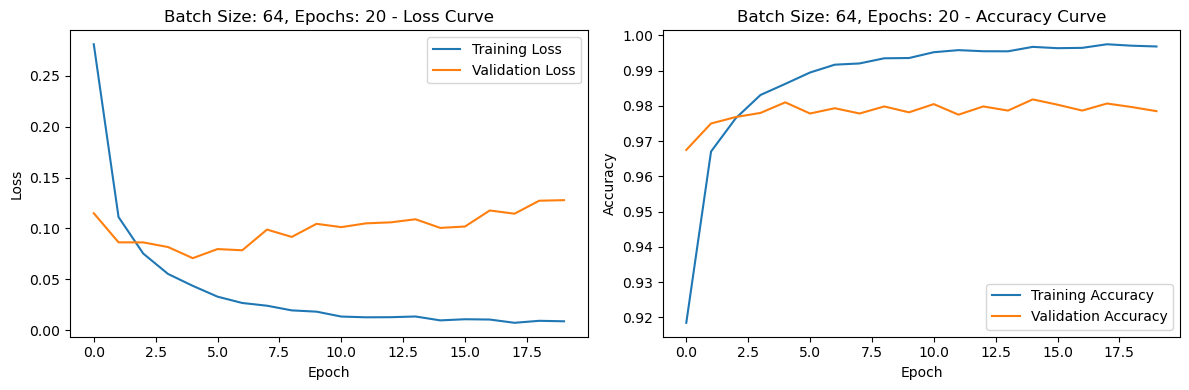

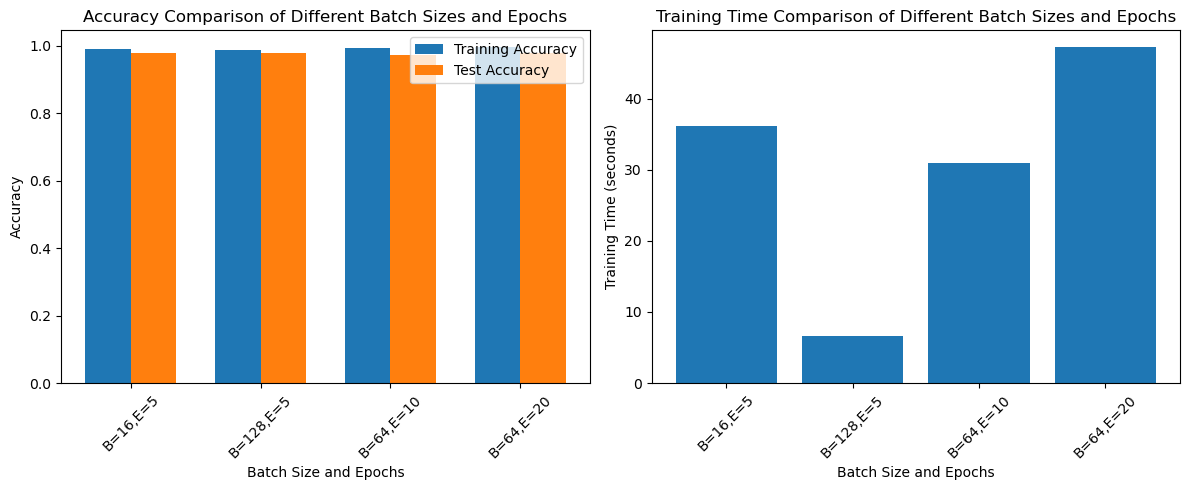

In [101]:
# MNIST - 實驗3：比較不同批次大小和訓練輪數
print("\n========== MNIST - Experiment 3: Comparing Different Batch Sizes and Epochs ==========")
# 存儲實驗結果
batch_epoch_results = []
# 執行實驗
for config in batch_epoch_configs:
    print(f"\nTraining model with batch_size={config['batch_size']}, epochs={config['epochs']}...")
    
    # 構建模型
    model = build_mnist_model(
        hidden_layers=2,  # 使用2層隱藏層
        neurons_per_layer=128
    )
    
    # 訓練和評估模型
    result = train_evaluate_mnist(
        model, x_train_flat, y_train_cat, x_test_flat, y_test_cat,
        batch_size=config['batch_size'],
        epochs=config['epochs']
    )
    
    # 添加配置信息
    result['config'] = config
    batch_epoch_results.append(result)
    
    # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Training Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    
    # 繪製訓練歷史
    plot_mnist_history(result['history'], 
                      f"Batch Size: {config['batch_size']}, Epochs: {config['epochs']}")
# 比較不同批次大小和訓練輪數的結果
plt.figure(figsize=(12, 5))
# 準確率對比
plt.subplot(1, 2, 1)
configs = [f"B={c['batch_size']},E={c['epochs']}" for c in batch_epoch_configs]
train_accs = [result['train_accuracy'] for result in batch_epoch_results]
test_accs = [result['test_accuracy'] for result in batch_epoch_results]
x = np.arange(len(configs))
width = 0.35
plt.bar(x - width/2, train_accs, width, label='Training Accuracy')
plt.bar(x + width/2, test_accs, width, label='Test Accuracy')
plt.xlabel('Batch Size and Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.legend()
# 訓練時間對比
plt.subplot(1, 2, 2)
times = [result['training_time'] for result in batch_epoch_results]
plt.bar(x, times)
plt.xlabel('Batch Size and Epochs')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
========== MNIST實驗結果分析 ==========
3. 批次大小和訓練輪數實驗結果:
  批次=16, 輪數=5: 測試準確率 = 0.9788, 訓練時間 = 36.19秒
  批次=128, 輪數=5: 測試準確率 = 0.9769, 訓練時間 = 6.60 秒
  批次=64, 輪數=10: 測試準確率 = 0.9730, 訓練時間 = 30.90秒
  批次=64, 輪數=20: 測試準確率 = 0.9780, 訓練時間 = 47.27秒

分析: 實驗結果顯示，批次大小和訓練輪數對模型性能和訓練效率有顯著影響。小批次(16)配合較短訓練(5輪)達到了較高的準確率(0.9788)，但訓練時間(36.19秒)較長。大批次(128)在相同輪數下準確率略低(0.9769)，但訓練時間大幅縮短至僅6.60秒，效率提升顯著。中批次(64)在10輪訓練下的準確率(0.9730)反而是最低的，但增加到20輪後，準確率提升至0.9780，接近小批次的水平，但訓練時間增至47.27秒。


========== Boston - Experiment 1: Comparing Different Network Depths ==========

Training Shallow Network (Hidden Layers: 1)...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 571.3521 - mae: 22.1422 - val_loss: 479.8716 - val_mae: 20.9370
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 570.0426 - mae: 21.9152 - val_loss: 462.6805 - val_mae: 20.5310
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 575.9472 - mae: 22.0516 - val_loss: 444.2884 - val_mae: 20.0913
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 505.7677 - mae: 20.6134 - val_loss: 424.3832 - val_mae: 19.6048
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 488.8746 - mae: 20.4691 - val_loss: 402.2167 - val_mae: 19.0621
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 479.6121 - mae: 20.0164 - val_loss: 377.9338 - val_mae: 18.4477
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 449.2593 - mae: 19.2459 - val_loss: 352.1172 - val_mae: 17.7629
Epoch 8/50
12/1

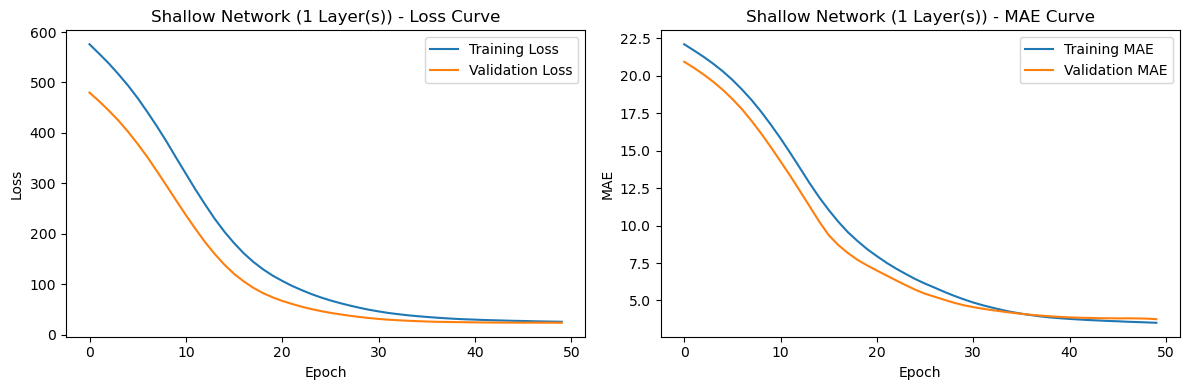


Training Medium Network (Hidden Layers: 2)...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 601.3130 - mae: 22.8605 - val_loss: 473.9253 - val_mae: 20.7511
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 550.1661 - mae: 21.5348 - val_loss: 432.4879 - val_mae: 19.6944
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 507.6647 - mae: 20.6467 - val_loss: 380.3845 - val_mae: 18.2858
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 444.7936 - mae: 18.9533 - val_loss: 312.9098 - val_mae: 16.3854
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 351.1651 - mae: 16.4313 - val_loss: 232.6693 - val_mae: 13.8559
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 283.4792 - mae: 14.6904 - val_loss: 149.0883 - val_mae: 10.9093
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 182.7085 - mae: 11.0938 - val_loss: 84.6083 - val_mae: 7.7438
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 119.0610 - mae: 8.5402 - val_loss: 51.0170

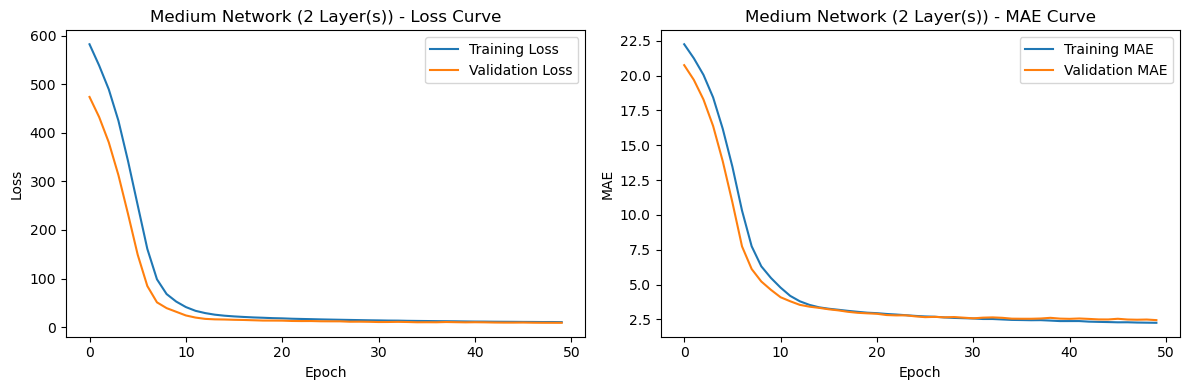


Training Deep Network (Hidden Layers: 4)...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 592.0145 - mae: 22.2020 - val_loss: 456.9124 - val_mae: 20.2236
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 532.1708 - mae: 20.8736 - val_loss: 342.8637 - val_mae: 16.9967
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 375.1346 - mae: 16.5634 - val_loss: 154.1588 - val_mae: 10.4881
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144.7217 - mae: 9.5888 - val_loss: 78.3723 - val_mae: 6.6737
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66.4576 - mae: 6.0618 - val_loss: 30.5363 - val_mae: 4.3849
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.3652 - mae: 4.6869 - val_loss: 22.2303 - val_mae: 3.8030
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.8546 - mae: 4.0241 - val_loss: 18.3017 - val_mae: 3.5421
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.9465 - mae: 4.0065 - val_loss: 16.2178 - val_mae: 3.34

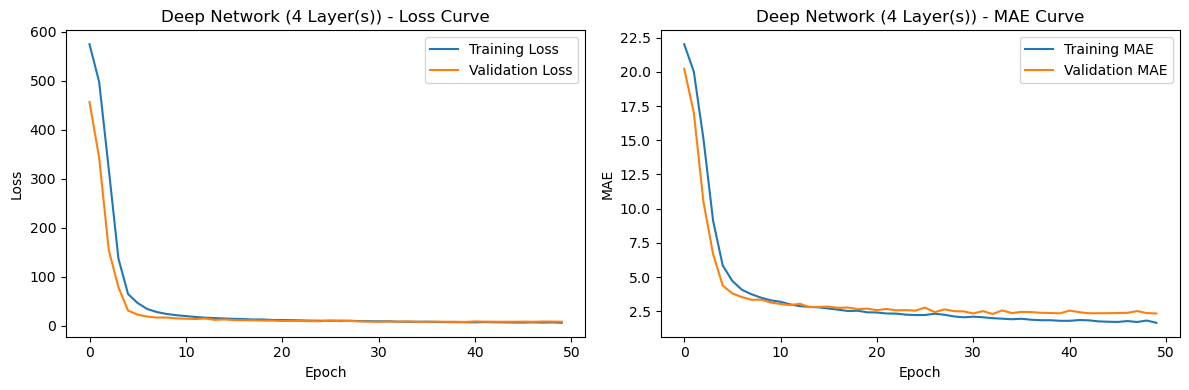

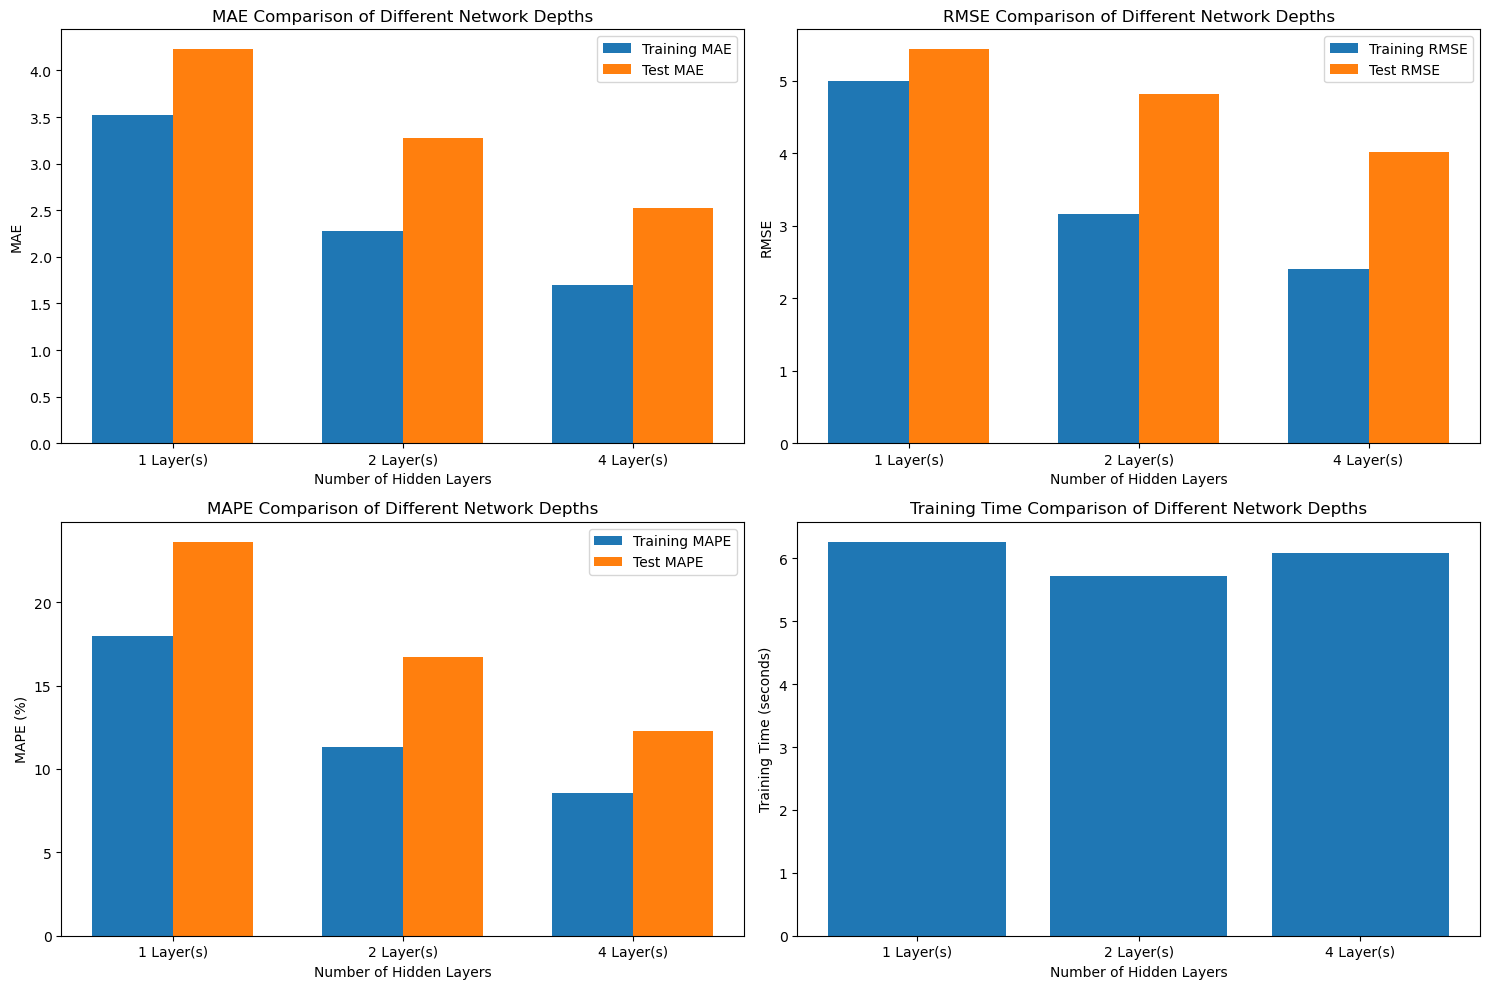

In [103]:
# Boston - 實驗1：比較不同網絡深度
print("\n========== Boston - Experiment 1: Comparing Different Network Depths ==========")
# 存儲實驗結果
boston_depth_results = []
# 執行實驗
for config in depth_configs:
    print(f"\nTraining {config['name']} (Hidden Layers: {config['hidden_layers']})...")
    
    # 構建模型
    model = build_boston_model(
        hidden_layers=config['hidden_layers'],
        neurons_per_layer=64  # Boston模型使用較少的神經元
    )
    
    # 訓練和評估模型
    result = train_evaluate_boston(
        model, boston_x_train, boston_y_train, boston_x_test, boston_y_test,
        epochs=50
    )
    
    # 添加配置信息
    result['config'] = config
    boston_depth_results.append(result)
    
    # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Training MAE: {result['train_mae']:.4f}, RMSE: {result['train_rmse']:.4f}, MAPE: {result['train_mape']:.4f}%")
    print(f"Test MAE: {result['test_mae']:.4f}, RMSE: {result['test_rmse']:.4f}, MAPE: {result['test_mape']:.4f}%")
    
    # 繪製訓練歷史
    plot_boston_history(result['history'], f"{config['name']} ({config['hidden_layers']} Layer(s))")
# 比較不同深度的結果
plt.figure(figsize=(15, 10))
# MAE對比
plt.subplot(2, 2, 1)
layer_counts = [config['hidden_layers'] for config in depth_configs]
train_maes = [result['train_mae'] for result in boston_depth_results]
test_maes = [result['test_mae'] for result in boston_depth_results]
x = np.arange(len(layer_counts))
width = 0.35
plt.bar(x - width/2, train_maes, width, label='Training MAE')
plt.bar(x + width/2, test_maes, width, label='Test MAE')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('MAE')
plt.title('MAE Comparison of Different Network Depths')
plt.xticks(x, [f"{d} Layer(s)" for d in layer_counts])
plt.legend()
# RMSE對比
plt.subplot(2, 2, 2)
train_rmses = [result['train_rmse'] for result in boston_depth_results]
test_rmses = [result['test_rmse'] for result in boston_depth_results]
plt.bar(x - width/2, train_rmses, width, label='Training RMSE')
plt.bar(x + width/2, test_rmses, width, label='Test RMSE')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Network Depths')
plt.xticks(x, [f"{d} Layer(s)" for d in layer_counts])
plt.legend()
# MAPE對比
plt.subplot(2, 2, 3)
train_mapes = [result['train_mape'] for result in boston_depth_results]
test_mapes = [result['test_mape'] for result in boston_depth_results]
plt.bar(x - width/2, train_mapes, width, label='Training MAPE')
plt.bar(x + width/2, test_mapes, width, label='Test MAPE')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison of Different Network Depths')
plt.xticks(x, [f"{d} Layer(s)" for d in layer_counts])
plt.legend()
# 訓練時間對比
plt.subplot(2, 2, 4)
times = [result['training_time'] for result in boston_depth_results]
plt.bar(x, times)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Different Network Depths')
plt.xticks(x, [f"{d} Layer(s)" for d in layer_counts])
plt.tight_layout()
plt.show()

In [ ]:
========== Boston房價實驗結果分析 ==========
1. 網絡深度實驗結果:
  淺層網絡 (1層): 測試MAE = 4.2294, 測試RMSE = 5.4352, 測試MAPE = 23.6407%, 訓練時間 = 6.27秒
  中層網絡 (2層): 測試MAE = 3.2759, 測試RMSE = 4.8181, 測試MAPE = 16.7424%, 訓練時間 = 5.72秒
  深層網絡 (4層): 測試MAE = 2.5267, 測試RMSE = 4.0197, 測試MAPE = 12.2921%, 訓練時間 = 6.08秒

分析:隨著網絡深度增加，預測準確性明顯提高。深層網絡(4層)表現最佳，MAE為2.5267，比淺層網絡(4.2294)降低約40%，MAPE從23.6407%降至12.2921%。增加深度導致訓練時間略微變化（從6.27秒到6.08秒），但模型精度顯著提升，表明對房價預測這類複雜問題，深層網絡確實更有效。


========== Boston - Experiment 2: Comparing Different Activation Functions ==========

Training model with Sigmoid activation function...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 570.3000 - mae: 22.3336 - val_loss: 484.5916 - val_mae: 21.0312
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 552.4540 - mae: 21.6912 - val_loss: 431.5322 - val_mae: 19.7442
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 499.8704 - mae: 20.2503 - val_loss: 386.4399 - val_mae: 18.5855
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 494.5359 - mae: 19.9936 - val_loss: 348.9663 - val_mae: 17.5718
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 455.4901 - mae: 19.1198 - val_loss: 319.0569 - val_mae: 16.7192
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 420.0786 - mae: 18.2500 - val_loss: 294.6335 - val_mae: 15.9869
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 348.6205 - mae: 16.5919 - val_loss: 274.5189 - val_mae: 15.3524
Epoch 

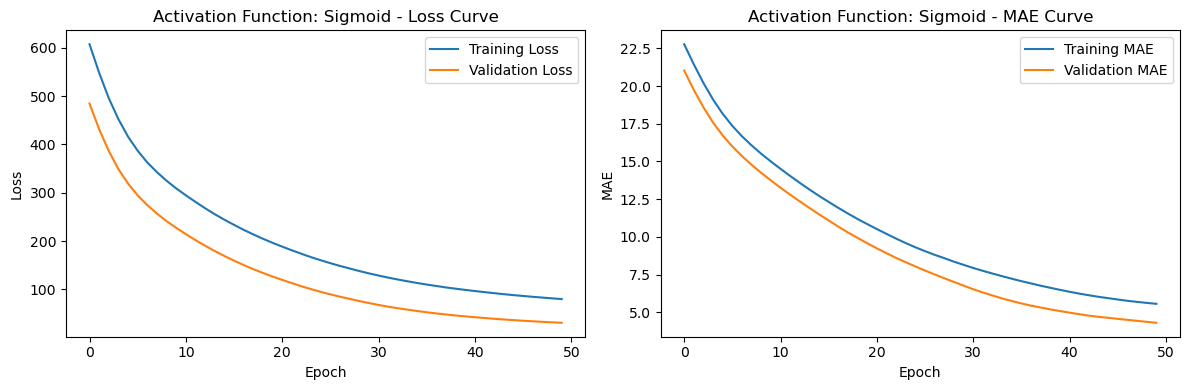


Training model with ReLU activation function...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 573.4189 - mae: 22.0593 - val_loss: 446.4396 - val_mae: 20.0666
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 500.8177 - mae: 20.4949 - val_loss: 385.3517 - val_mae: 18.4668
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 456.9819 - mae: 19.2061 - val_loss: 306.6562 - val_mae: 16.3292
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 340.5101 - mae: 16.3213 - val_loss: 215.5609 - val_mae: 13.4106
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 256.5306 - mae: 13.6782 - val_loss: 126.9840 - val_mae: 9.8630
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 148.5195 - mae: 9.7534 - val_loss: 69.1891 - val_mae: 6.8557
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 92.5570 - mae: 7.3062 - val_loss: 51.5039 - val_mae: 6.0696
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 64.4912 - mae: 6.1248 - val_loss: 44.0263 

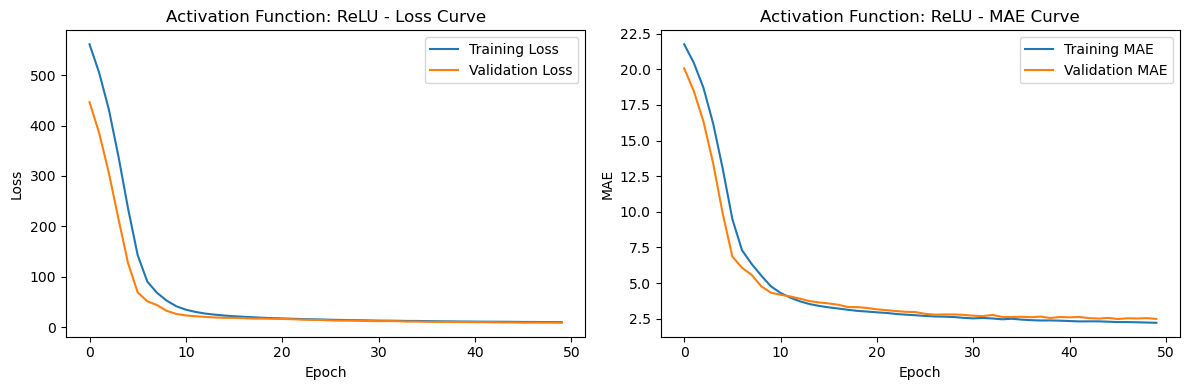


Training model with Softplus activation function...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 513.6998 - mae: 20.4483 - val_loss: 342.7919 - val_mae: 17.3496
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 387.8806 - mae: 17.4337 - val_loss: 225.3333 - val_mae: 13.6958
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 298.4255 - mae: 14.4596 - val_loss: 117.8430 - val_mae: 9.4499
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 142.6682 - mae: 9.3217 - val_loss: 42.0719 - val_mae: 5.3088
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.6823 - mae: 5.6396 - val_loss: 17.3931 - val_mae: 3.1916
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38.6359 - mae: 4.2816 - val_loss: 20.9490 - val_mae: 3.6348
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44.5114 - mae: 5.0703 - val_loss: 19.1641 - val_mae: 3.5148
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 50.9879 - mae: 5.0059 - val_loss: 14.8811 - v

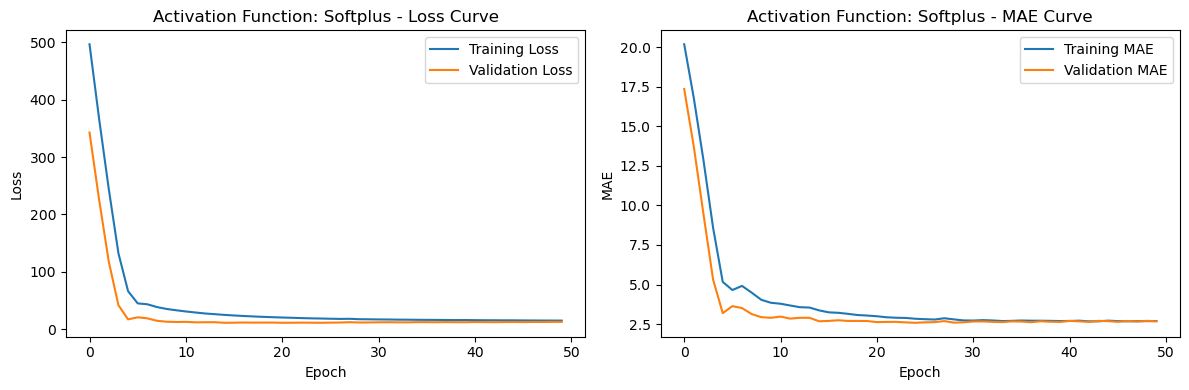

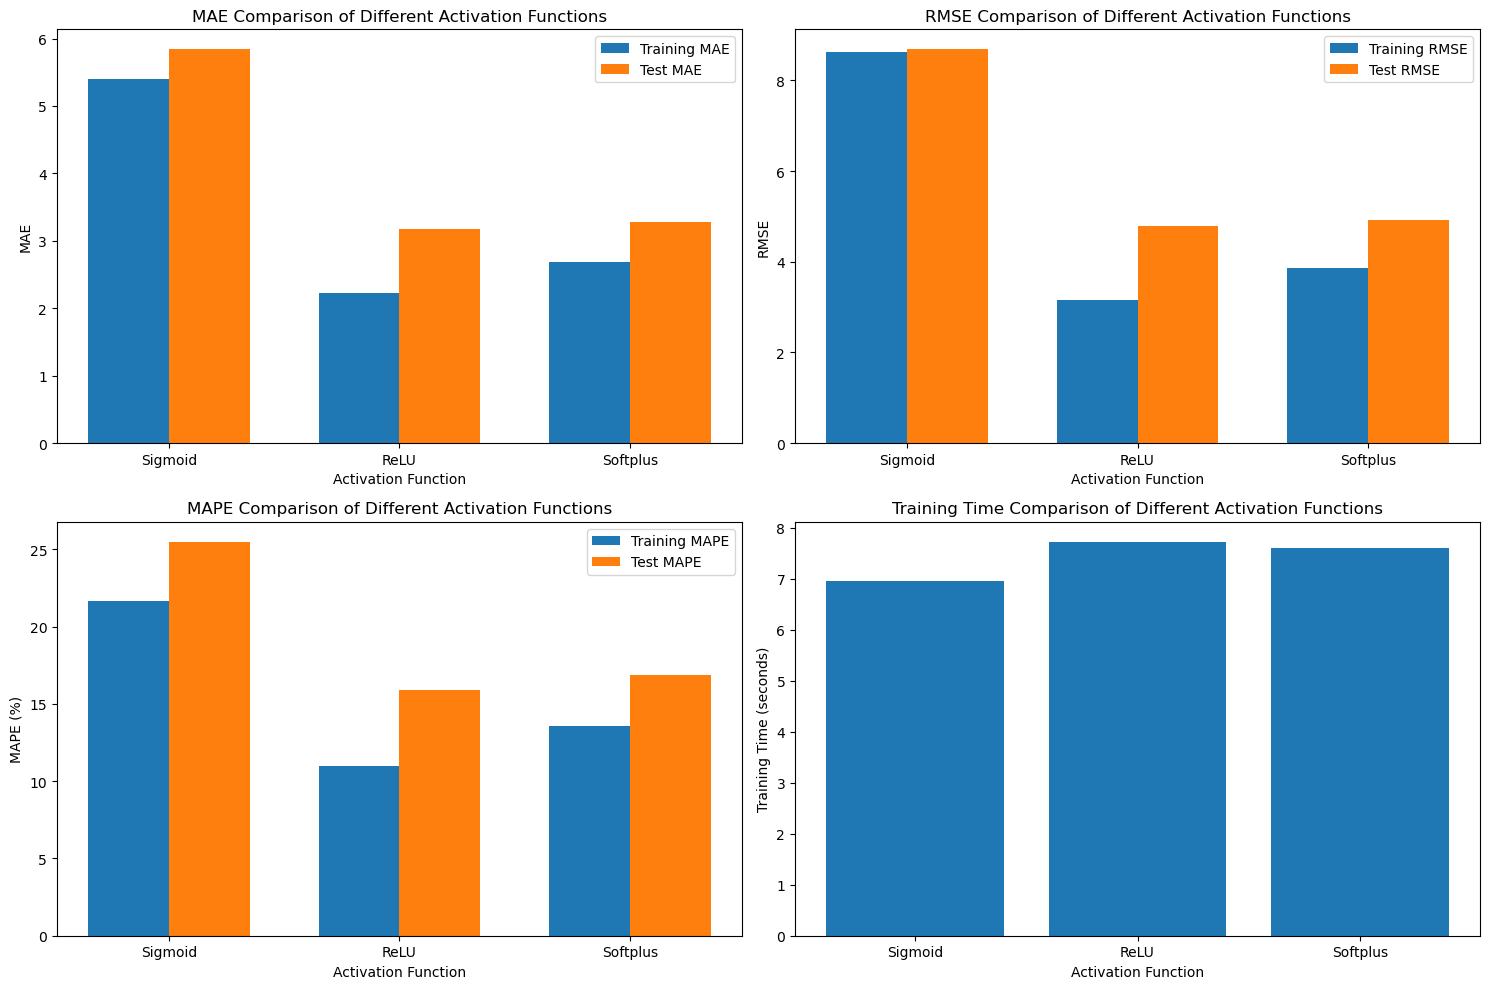

In [105]:
# Boston - 實驗2：比較不同激活函數
print("\n========== Boston - Experiment 2: Comparing Different Activation Functions ==========")
# 存儲實驗結果
boston_activation_results = []
# 執行實驗
for config in activation_configs:
    print(f"\nTraining model with {config['name']} activation function...")
    
    # 構建模型
    model = build_boston_model(
        hidden_layers=2,  # 使用2層隱藏層
        neurons_per_layer=64,
        activation=config['activation']
    )
    
    # 訓練和評估模型
    result = train_evaluate_boston(
        model, boston_x_train, boston_y_train, boston_x_test, boston_y_test,
        epochs=50
    )
    
    # 添加配置信息
    result['config'] = config
    boston_activation_results.append(result)
    
    # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Training MAE: {result['train_mae']:.4f}, RMSE: {result['train_rmse']:.4f}, MAPE: {result['train_mape']:.4f}%")
    print(f"Test MAE: {result['test_mae']:.4f}, RMSE: {result['test_rmse']:.4f}, MAPE: {result['test_mape']:.4f}%")
    
    # 繪製訓練歷史
    plot_boston_history(result['history'], f"Activation Function: {config['name']}")
# 比較不同激活函數的結果
plt.figure(figsize=(15, 10))
# MAE對比
plt.subplot(2, 2, 1)
acts = [config['name'] for config in activation_configs]
train_maes = [result['train_mae'] for result in boston_activation_results]
test_maes = [result['test_mae'] for result in boston_activation_results]
x = np.arange(len(acts))
width = 0.35
plt.bar(x - width/2, train_maes, width, label='Training MAE')
plt.bar(x + width/2, test_maes, width, label='Test MAE')
plt.xlabel('Activation Function')
plt.ylabel('MAE')
plt.title('MAE Comparison of Different Activation Functions')
plt.xticks(x, acts)
plt.legend()
# RMSE對比
plt.subplot(2, 2, 2)
train_rmses = [result['train_rmse'] for result in boston_activation_results]
test_rmses = [result['test_rmse'] for result in boston_activation_results]
plt.bar(x - width/2, train_rmses, width, label='Training RMSE')
plt.bar(x + width/2, test_rmses, width, label='Test RMSE')
plt.xlabel('Activation Function')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Activation Functions')
plt.xticks(x, acts)
plt.legend()
# MAPE對比
plt.subplot(2, 2, 3)
train_mapes = [result['train_mape'] for result in boston_activation_results]
test_mapes = [result['test_mape'] for result in boston_activation_results]
plt.bar(x - width/2, train_mapes, width, label='Training MAPE')
plt.bar(x + width/2, test_mapes, width, label='Test MAPE')
plt.xlabel('Activation Function')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison of Different Activation Functions')
plt.xticks(x, acts)
plt.legend()
# 訓練時間對比
plt.subplot(2, 2, 4)
times = [result['training_time'] for result in boston_activation_results]
plt.bar(x, times)
plt.xlabel('Activation Function')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Different Activation Functions')
plt.xticks(x, acts)
plt.tight_layout()
plt.show()

In [ ]:
========== Boston房價實驗結果分析 ==========
2. 激活函數實驗結果:
  Sigmoid: 測試MAE = 5.8441, 測試RMSE = 8.6898, 測試MAPE = 25.4976%, 訓練時間 = 6.97秒
  ReLU: 測試MAE = 3.1748, 測試RMSE = 4.7869, 測試MAPE = 15.9137%, 訓練時間 = 7.73 秒
  Softplus: 測試MAE = 3.2749, 測試RMSE = 4.9243, 測試MAPE = 16.8373%, 訓練時間 = 7.61秒

分析: ReLU和Softplus表現接近且明顯優於Sigmoid。ReLU的MAE為3.1748，MAPE為15.9137%；Softplus指標相近，MAE為3.2749，MAPE為16.8373%。Sigmoid表現最差，MAE高達5.8441，MAPE達25.4976%。數據清晰顯示，在非線性回歸問題中，ReLU類激活函數明顯優於Sigmoid。


========== Boston - Experiment 3: Comparing Different Batch Sizes and Epochs ==========

Training model with batch_size=16, epochs=5...
Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 512.4294 - mae: 21.1161 - val_loss: 444.0579 - val_mae: 19.9735
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 514.1205 - mae: 20.4108 - val_loss: 336.1292 - val_mae: 17.0539
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 377.0706 - mae: 17.2777 - val_loss: 170.0828 - val_mae: 11.5984
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170.9937 - mae: 10.7220 - val_loss: 61.7627 - val_mae: 6.7509
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77.9013 - mae: 6.6376 - val_loss: 37.5051 - val_mae: 5.0218
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training Time: 1.92 seconds
Training MAE: 5.4685, RMSE: 7.3291, MAPE: 27.7685%
Test MAE: 6.0275, RMSE: 7.7888, MAPE: 32.2439%


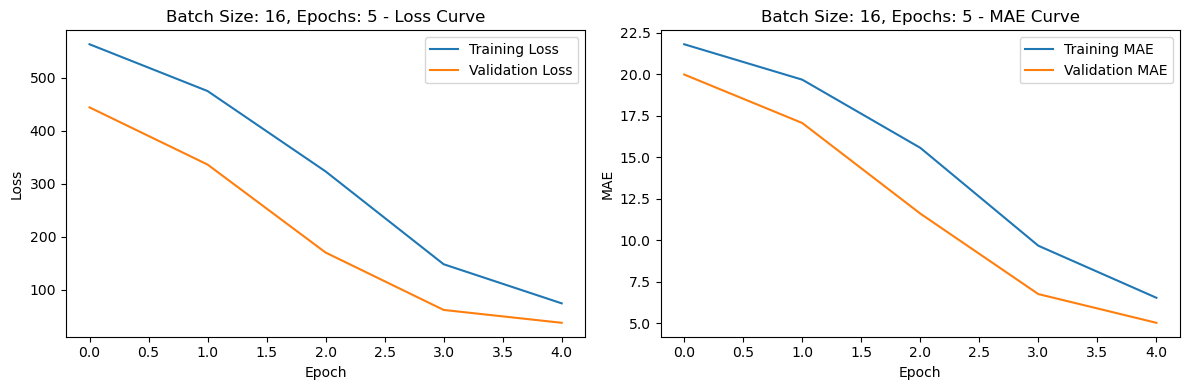


Training model with batch_size=128, epochs=5...
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 577.0684 - mae: 22.1521 - val_loss: 487.6880 - val_mae: 21.0711
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 596.5049 - mae: 22.4838 - val_loss: 476.0366 - val_mae: 20.7894
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 570.5927 - mae: 21.9329 - val_loss: 464.5735 - val_mae: 20.5058
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 557.5564 - mae: 21.5832 - val_loss: 452.9364 - val_mae: 20.2126
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 527.7057 - mae: 20.9698 - val_loss: 440.8068 - val_mae: 19.9007
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training Time: 1.81 seconds
Training MAE: 20.8054, RMSE: 22.7435, MAPE: 91.2990%
Test MAE: 21.5195, RMSE: 23.3735, MAPE: 91.4815%


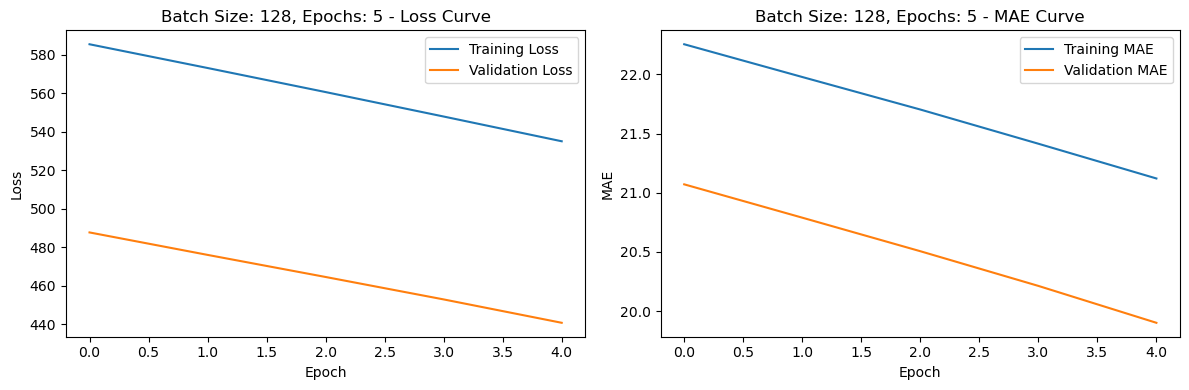


Training model with batch_size=64, epochs=10...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 590.2761 - mae: 22.3748 - val_loss: 477.3243 - val_mae: 20.8662
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 550.0424 - mae: 21.6018 - val_loss: 453.0663 - val_mae: 20.2537
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 491.3376 - mae: 20.3060 - val_loss: 428.1978 - val_mae: 19.6039
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 522.4966 - mae: 20.7832 - val_loss: 400.8855 - val_mae: 18.8663
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 428.7770 - mae: 18.7329 - val_loss: 370.1442 - val_mae: 17.9912
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 403.5295 - mae: 18.1336 - val_loss: 335.5462 - val_mae: 16.9766
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 399.3410 - mae: 17.5727 - val_loss: 296.8606 - val_mae: 15.8465
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 349.0387 - mae: 16.2663 - val_loss: 254.9748 - 

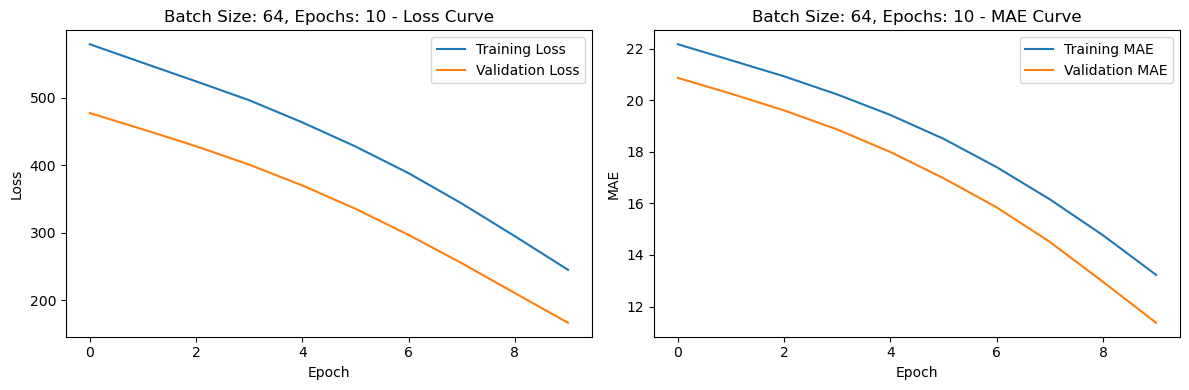


Training model with batch_size=64, epochs=20...
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 612.0891 - mae: 22.5774 - val_loss: 463.6191 - val_mae: 20.5009
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 551.6263 - mae: 21.5566 - val_loss: 436.1232 - val_mae: 19.7887
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 510.0987 - mae: 20.5536 - val_loss: 406.2275 - val_mae: 18.9780
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 492.3182 - mae: 20.0100 - val_loss: 371.8729 - val_mae: 17.9987
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 431.3436 - mae: 18.6232 - val_loss: 331.7586 - val_mae: 16.8738
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 381.1335 - mae: 17.2268 - val_loss: 286.2245 - val_mae: 15.5260
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 380.9704 - mae: 16.9092 - val_loss: 235.5636 - val_mae: 13.8712
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 289.3711 - mae: 14.2273 - val_loss: 184.3208 - 

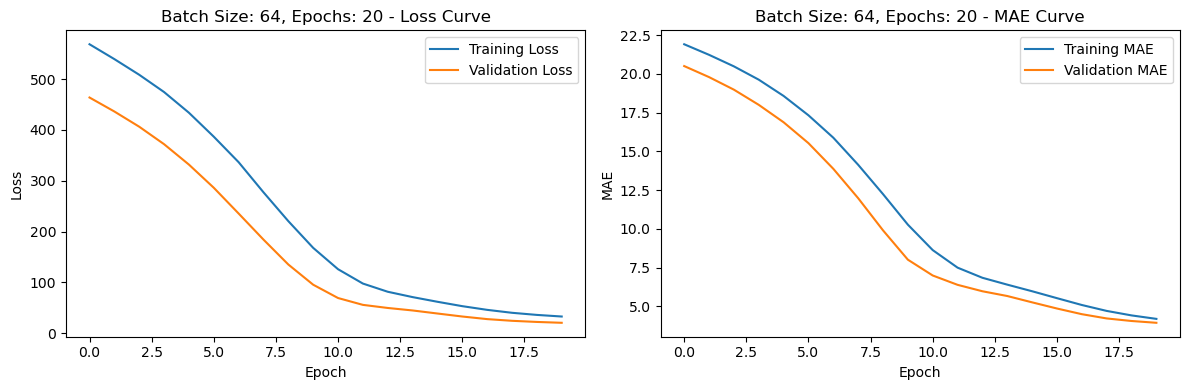

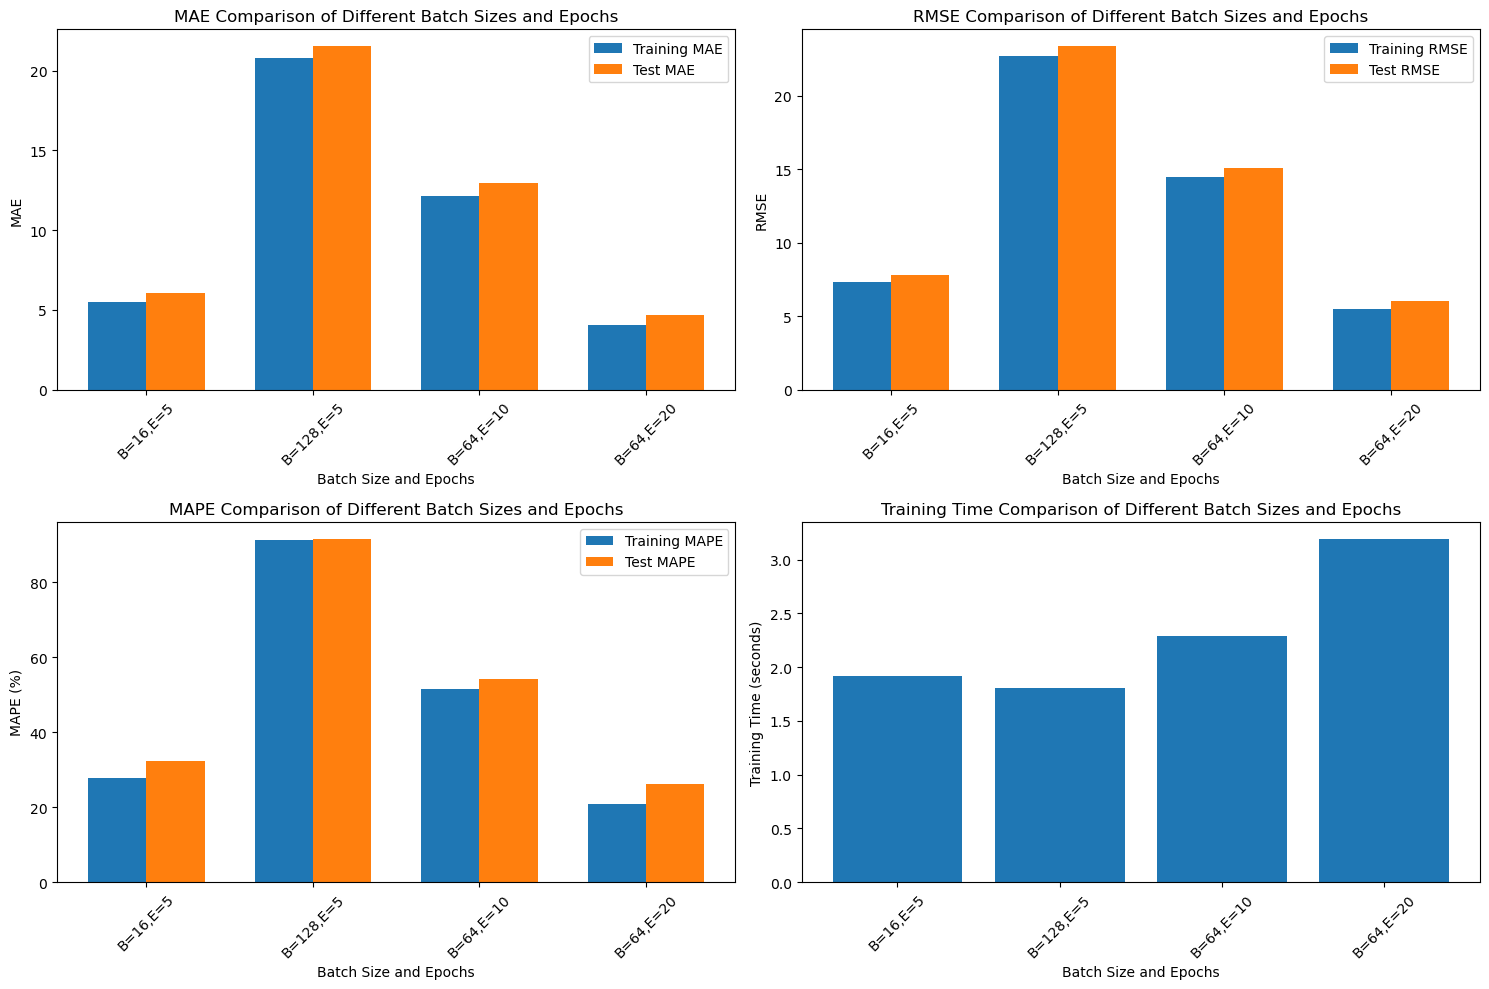

In [107]:
# Boston - 實驗3：比較不同批次大小和訓練輪數
print("\n========== Boston - Experiment 3: Comparing Different Batch Sizes and Epochs ==========")
# 存儲實驗結果
boston_batch_epoch_results = []
# 執行實驗
for config in batch_epoch_configs:
    print(f"\nTraining model with batch_size={config['batch_size']}, epochs={config['epochs']}...")
    
    # 構建模型
    model = build_boston_model(
        hidden_layers=2,  # 使用2層隱藏層
        neurons_per_layer=64
    )
    
    # 訓練和評估模型
    result = train_evaluate_boston(
        model, boston_x_train, boston_y_train, boston_x_test, boston_y_test,
        batch_size=config['batch_size'],
        epochs=config['epochs']
    )
    
    # 添加配置信息
    result['config'] = config
    boston_batch_epoch_results.append(result)
    
    # 輸出結果
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Training MAE: {result['train_mae']:.4f}, RMSE: {result['train_rmse']:.4f}, MAPE: {result['train_mape']:.4f}%")
    print(f"Test MAE: {result['test_mae']:.4f}, RMSE: {result['test_rmse']:.4f}, MAPE: {result['test_mape']:.4f}%")
    
    # 繪製訓練歷史
    plot_boston_history(result['history'], 
                       f"Batch Size: {config['batch_size']}, Epochs: {config['epochs']}")
# 比較不同批次大小和訓練輪數的結果
plt.figure(figsize=(15, 10))
# MAE對比
plt.subplot(2, 2, 1)
configs = [f"B={c['batch_size']},E={c['epochs']}" for c in batch_epoch_configs]
train_maes = [result['train_mae'] for result in boston_batch_epoch_results]
test_maes = [result['test_mae'] for result in boston_batch_epoch_results]
x = np.arange(len(configs))
width = 0.35
plt.bar(x - width/2, train_maes, width, label='Training MAE')
plt.bar(x + width/2, test_maes, width, label='Test MAE')
plt.xlabel('Batch Size and Epochs')
plt.ylabel('MAE')
plt.title('MAE Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.legend()
# RMSE對比
plt.subplot(2, 2, 2)
train_rmses = [result['train_rmse'] for result in boston_batch_epoch_results]
test_rmses = [result['test_rmse'] for result in boston_batch_epoch_results]
plt.bar(x - width/2, train_rmses, width, label='Training RMSE')
plt.bar(x + width/2, test_rmses, width, label='Test RMSE')
plt.xlabel('Batch Size and Epochs')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.legend()
# MAPE對比
plt.subplot(2, 2, 3)
train_mapes = [result['train_mape'] for result in boston_batch_epoch_results]
test_mapes = [result['test_mape'] for result in boston_batch_epoch_results]
plt.bar(x - width/2, train_mapes, width, label='Training MAPE')
plt.bar(x + width/2, test_mapes, width, label='Test MAPE')
plt.xlabel('Batch Size and Epochs')
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.legend()
# 訓練時間對比
plt.subplot(2, 2, 4)
times = [result['training_time'] for result in boston_batch_epoch_results]
plt.bar(x, times)
plt.xlabel('Batch Size and Epochs')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison of Different Batch Sizes and Epochs')
plt.xticks(x, configs, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
========== Boston房價實驗結果分析 ==========
3. 批次大小和訓練輪數實驗結果:
  批次=16, 輪數=5: 測試MAE = 6.0275, 測試RMSE = 7.7888, 測試MAPE = 32.2439%, 訓練時間 = 1.92秒
  批次=128, 輪數=5: 測試MAE = 21.5195, 測試RMSE = 23.3735, 測試MAPE = 91.4815%, 訓練時間 = 1.81秒
  批次=64, 輪數=10: 測試MAE = 12.9584, 測試RMSE = 15.0753, 測試MAPE = 54.2493%, 訓練時間 = 2.29秒
  批次=64, 輪數=20: 測試MAE = 4.6819, 測試RMSE = 6.0048, 測試MAPE = 26.1805%, 訓練時間 = 3.19秒

分析: 小批次(16)在短訓練(5輪)下表現相對合理（MAE為6.0275），而大批次(128)表現極差（MAE高達21.5195）。中批次(64)需增加至20輪才達到較好性能（MAE降至4.6819）。由於數據集規模有限（506樣本），大批次導致模型更新不充分，不足以有效學習數據特徵，這表明小規模數據集應選擇較小批次大小或增加訓練輪數以提升模型性能。